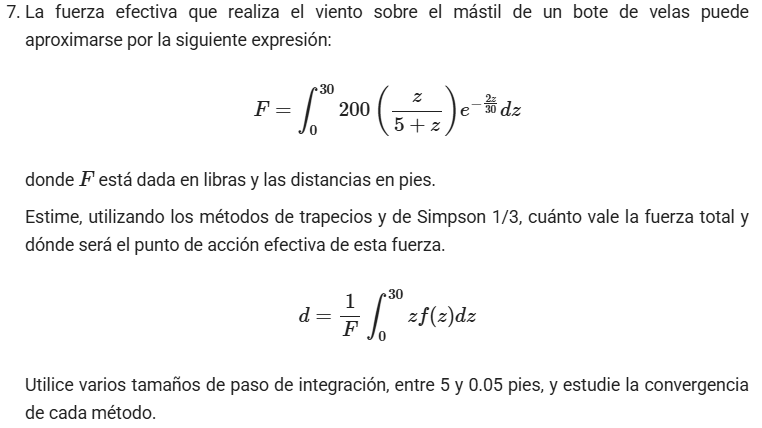

In [4]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [5]:
#   Defino los limites de integracion 
l_inf = 0
l_sup = 30

In [2]:
def funcion(z):

    return 200 * ( z / ( 5 + z ) ) * np.exp( ( - 2 * z ) / 30 )

In [19]:
h = [5, 5.5 , 4 , 4.5 , 3, 2, 1, 0.1, 0.01]

m = len(h)

res_trap = np.zeros((m,3))
res_simp = np.zeros((m,3))

j = 0

for i in h:
    z = np.arange(l_inf,l_sup,i)
    f = funcion(z)

    #   Esta es la fuerza total

    F_trap = sp.integrate.trapezoid(f,z)
    F_simp = sp.integrate.simpson(f,z)
    #print(F_trap,F_simp)

    #   Punto de accion efectiva de la fuerza

    d_trap = 1 / F_trap * sp.integrate.trapezoid(z*f,z)
    d_simp = 1 / F_simp * sp.integrate.simpson(z*f,z)
    #print(d_trap,d_simp) 

    res_trap[j, :] = [i, F_trap, d_trap]
    res_simp[j, :] = [i, F_simp, d_simp]
    j += 1

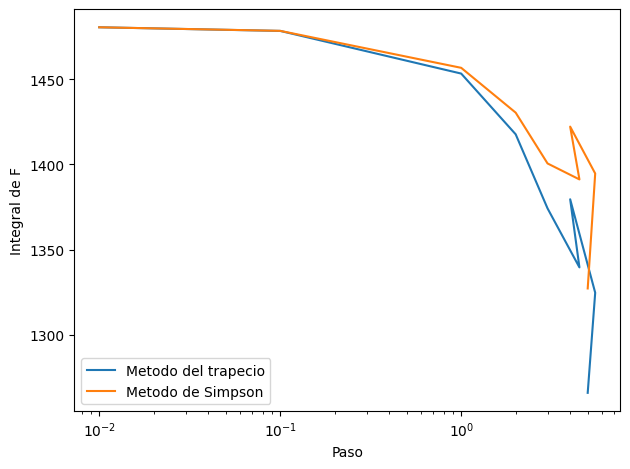

In [20]:
fig , ax =plt.subplots()

ax.plot(h, res_trap[:,1], label='Metodo del trapecio')
ax.plot(h, res_simp[:,1], label='Metodo de Simpson')

ax.set_xlabel('Paso')
ax.set_ylabel('Integral de F')

#ax.set_xscale('log')
ax.set_xscale('log')

ax.legend()
plt.tight_layout()
plt.show()